# The Thai Yelp Mythbuster and Food Recommender - Part 2

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Loading and EDA - master(granular) data-set (individual reviews)

In [2]:
#Loading data-set of all the restaurants with the reviews(granular yelp-data set; from scrapy)
df = pd.read_csv('./yelp/yelp_thai_clean.csv')

In [3]:
df.shape

(18948, 6)

In [4]:
df.head(3)

,address,date,price,rating,restaurant,text
0,"6057 Mission St, Daly City, CA 94014",04-03-2016,$,1,Thai Power Restaurant,Nancy whoever she is ...is very rude..we just ...
1,"6057 Mission St, Daly City, CA 94014",2/15/2012,$,2,Thai Power Restaurant,"When I walked in, I wasn't sure if this place ..."
2,"6057 Mission St, Daly City, CA 94014",11-08-2015,$,1,Thai Power Restaurant,this place is the worst place resto bar that i...


In [5]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['rating'], dtype='object'),
 dtype('O'): Index(['address', 'date', 'price', 'restaurant', 'text'], dtype='object')}

In [6]:
df.dtypes

address       object
date          object
price         object
rating         int64
restaurant    object
text          object
dtype: object

In [7]:
df['price'] = df['price'].apply(lambda x: len(x))

In [8]:
df.head(3)

,address,date,price,rating,restaurant,text
0,"6057 Mission St, Daly City, CA 94014",04-03-2016,1,1,Thai Power Restaurant,Nancy whoever she is ...is very rude..we just ...
1,"6057 Mission St, Daly City, CA 94014",2/15/2012,1,2,Thai Power Restaurant,"When I walked in, I wasn't sure if this place ..."
2,"6057 Mission St, Daly City, CA 94014",11-08-2015,1,1,Thai Power Restaurant,this place is the worst place resto bar that i...


In [9]:
df.isnull().sum()

address       0
date          0
price         0
rating        0
restaurant    0
text          0
dtype: int64

In [10]:
df.groupby(['restaurant', 'address']).agg({'text': ['count'], 'rating': ['mean', 'std']}).sort_values(('text', 'count'), ascending = False).head(10)

text  \
                                                                      count   
restaurant                  address                                           
Marnee Thai                 2225 Irving St, San Francisco, CA 94122     760   
King Of Thai Noodle House   184 O'Farrell St, San Francisco, CA 94102   702   
Banana Island               273 Lake Merced Blvd, Daly City, CA 94015   700   
Basil Thai Restaurant & Bar 1175 Folsom St, San Francisco, CA 94103     660   
Bangkok Garden Thai Cuisine 201 Southgate Ave, Daly City, CA 94015      567   
Thai House Express          599 Castro St, San Francisco, CA 94114      530   
Chabaa Thai Cuisine         420 Geary St, San Francisco, CA 94102       520   
Koh Samui & The Monkey      415 Brannan St, San Francisco, CA 94107     519   
Osha Thai                   311 3rd St, San Francisco, CA 94107         460   
Thep Phanom Thai Restaurant 400 Waller St, San Francisco, CA 94117      409   

                                                                         rating  \
                                                                           mean   
restaurant                  address                                               
Marnee Thai                 2225 Irving St, San Francisco, CA 94122    3.736842   
King Of Thai Noodle House   184 O'Farrell St, San Francisco, CA 94102  3.300570   
Banana Island               273 Lake Merced Blvd, Daly City, CA 94015  3.421429   
Basil Thai Restaurant & Bar 1175 Folsom St, San Francisco, CA 94103    3.859091   
Bangkok Garden Thai Cuisine 201 Southgate Ave, Daly City, CA 94015     3.439153   
Thai House Express          599 Castro St, San Francisco, CA 94114     3.515094   
Chabaa Thai Cuisine         420 Geary St, San Francisco, CA 94102      3.728846   
Koh Samui & The Monkey      415 Brannan St, San Francisco, CA 94107    3.356455   
Osha Thai                   311 3rd St, San Francisco, CA 94107        3.384783   
Thep Phanom Thai Restaurant 400 Waller St, San Francisco, CA 94117     3.657702   

                                                                                 
                                                                            std  
restaurant                  address                                              
Marnee Thai                 2225 Irving St, San Francisco, CA 94122    1.276817  
King Of Thai Noodle House   184 O'Farrell St, San Francisco, CA 94102  1.237537  
Banana Island               273 Lake Merced Blvd, Daly City, CA 94015  1.096671  
Basil Thai Restaurant & Bar 1175 Folsom St, San Francisco, CA 94103    1.011238  
Bangkok Garden Thai Cuisine 201 Southgate Ave, Daly City, CA 94015     1.230969  
Thai House Express          599 Castro St, San Francisco, CA 94114     1.222334  
Chabaa Thai Cuisine         420 Geary St, San Francisco, CA 94102      1.184979  
Koh Samui & The Monkey      415 Brannan St, San Francisco, CA 94107    1.101995  
Osha Thai                   311 3rd St, San Francisco, CA 94107        1.183486  
Thep Phanom Thai Restaurant 400 Waller St, San Francisco, CA 94117     1.234788

Text(0,0.5,'rating')

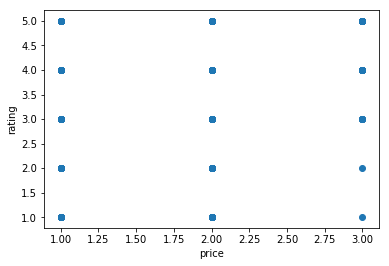

In [11]:
#Analyzing the scatter distribution between rating v/s price
plt.scatter(df['price'], df['rating'])
plt.xlabel('price')
plt.ylabel('rating')

In [12]:
#df.loc[df.price==3,:]

Text(0.5,0,'rating')

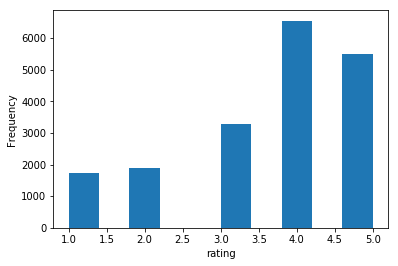

In [13]:
# Histogram of ratings(frequency)
df['rating'].plot(kind='hist')
plt.xlabel('rating')

C:\Users\dabhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


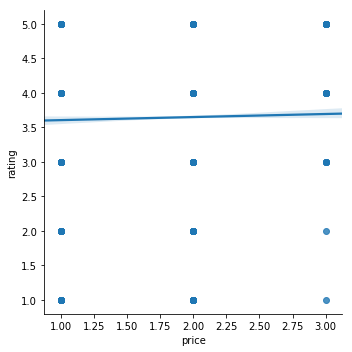

In [14]:
# Looking at the linear relation b/w rating and price - inconclusive
sns.lmplot("price", "rating", df)

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
sid = SentimentIntensityAnalyzer()
# sentiment analysis on reviews for EDA
sentiments = []
sid = SentimentIntensityAnalyzer()
for i in range(df.shape[0]):
        line = df['text'].iloc[i]
        sentiment = sid.polarity_scores(line)
        sentiments.append([sentiment['neg'], sentiment['pos'],
                           sentiment['neu'], sentiment['compound']])
df[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)

C:\Users\dabhi\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


C:\Users\dabhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


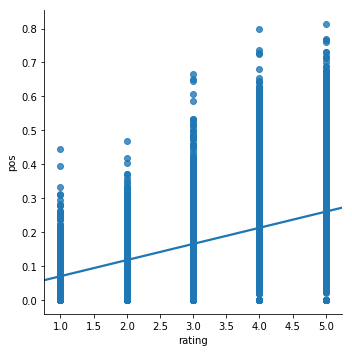

In [17]:
# Looking at the linear relation b/w rating and pos_sentiment - positive correlation
sns.lmplot("rating", "pos", df)

C:\Users\dabhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


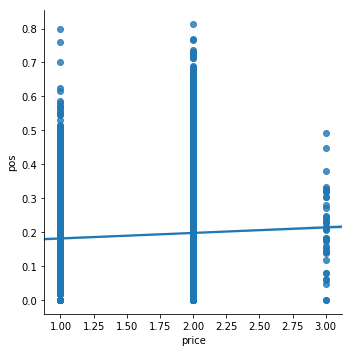

In [18]:
# Looking at the linear relation b/w price and pos_sentiment - inconclusive
sns.lmplot("price", "pos", df)

C:\Users\dabhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


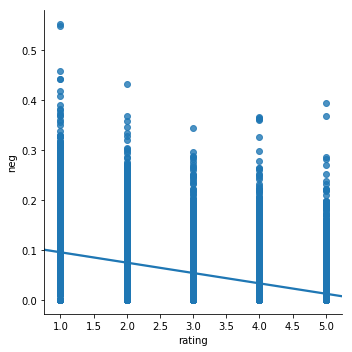

In [19]:
# Looking at the linear relation b/w rating and neg_sentiment - negative correlation
sns.lmplot("rating", "neg", df)

C:\Users\dabhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


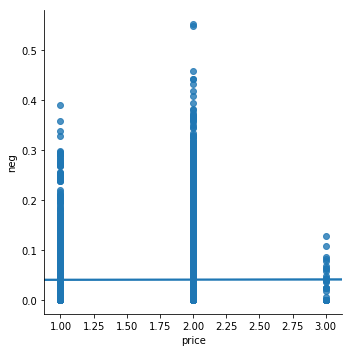

In [20]:
# Looking at the linear relation b/w price and neg_sentiment - inconclusive
sns.lmplot("price", "neg", df)

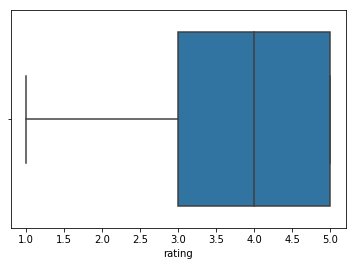

In [21]:
# Analysing box-plot of ratings which show a bulk of ratings b/w 3 and 5
sns.boxplot(x=df['rating'],  data=df)

##  Classification Modelling

#### We perform a classification modelling to check if we can predict a good/bad rating based on a review as a baseline before sentiment as the reviews contain all of our target(food) tokens. We vectorize the reviews using Count Vectorizer and TFIDF Vectorizer and run a Logistic Regression and a Naive Bayes Model

In [22]:
# Getting value counts on the ratings
df['rating'].value_counts()

4    6543
5    5500
3    3279
2    1904
1    1722
Name: rating, dtype: int64

In [23]:
# Creating a binary classifier for rating>=4 as good, rating<4 as bad 
df['binary_rating'] = df['rating'].apply(lambda x:1 if x==4 or x==5 else 0)

In [24]:
# Checking for class imbalance
df['binary_rating'].value_counts()

1    12043
0     6905
Name: binary_rating, dtype: int64

In [25]:
# Setting our X(feature) and y(target)
X = df['text']
y = df['binary_rating']

In [26]:
# Text Preprossing for modelling
# import string
# from nltk.corpus import stopwords

# def text_process(text):
#     '''
#     Takes in a string of text, then performs the following:
#     1. Remove all punctuation
#     2. Remove all stopwords
#     3. Return the cleaned text as a list of words
#     '''
#     nopunc = [char for char in text if char not in string.punctuation]
#     nopunc = ''.join(nopunc)
#     return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [28]:
cvec = CountVectorizer(stop_words='english').fit(X)
tfidf = TfidfVectorizer(stop_words='english').fit(X)

In [29]:
print(len(cvec.get_feature_names()))
print(len(tfidf.get_feature_names()))

24354
24354


In [30]:
X1 = cvec.transform(X)
X2 = tfidf.transform(X)

In [31]:
X1.dtype

dtype('int64')

In [32]:
# Performing a train-test split
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y,shuffle=True,stratify=y,random_state=42,test_size=0.3)
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y,shuffle=True,stratify=y,random_state=42,test_size=0.3)

#### Resampling Train Data Set

In [33]:
# from sklearn.utils import resample
# traindata = X_train.to_frame().merge(pd.DataFrame(y_train), how = 'left', right_index = True, left_index = True)
# train_majority = traindata[traindata['binary_rating'] == 1]
# train_minority = traindata[traindata['binary_rating'] == 0]
# train_minority_upsampled = resample(train_minority, 
#                                      replace = True, 
#                                      n_samples = train_majority.shape[0],
#                                      random_state = 42)

# train_data_upsampled = pd.concat([train_majority, train_minority_upsampled])
# X_train = train_data_upsampled.drop(columns = 'binary_rating')
# y_train = train_data_upsampled['binary_rating']
# y_train.value_counts()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

### Count Vectorizer - Classification Modelling

#### Logistic Regression

In [35]:
lr = LogisticRegression()
lr.fit(X1_train, y1_train)
y1_pred = lr.predict(X1_test)
print('accuracy score',accuracy_score(y1_test, y1_pred))

accuracy score 0.8490765171503958


In [36]:
# Confusion Matrix and Classification Report
print(confusion_matrix(y1_test, y1_pred))
print('\n')
print(classification_report(y1_test, y1_pred))

[[1566  506]
 [ 352 3261]]


             precision    recall  f1-score   support

          0       0.82      0.76      0.78      2072
          1       0.87      0.90      0.88      3613

avg / total       0.85      0.85      0.85      5685



#### Multinomial Naive Bayes

In [37]:
nb = MultinomialNB()
nb.fit(X1_train, y1_train)
y1_pred = nb.predict(X1_test)
print('accuracy score',accuracy_score(y1_test, y1_pred))

accuracy score 0.8316622691292876


In [38]:
# Confusion Matrix and Classification Report
print(confusion_matrix(y1_test, y1_pred))
print('\n')
print(classification_report(y1_test, y1_pred))

[[1420  652]
 [ 305 3308]]


             precision    recall  f1-score   support

          0       0.82      0.69      0.75      2072
          1       0.84      0.92      0.87      3613

avg / total       0.83      0.83      0.83      5685



### TFIDF Vectorizer - Classification Modelling 

#### Logistic Regression

In [39]:
lr = LogisticRegression()
lr.fit(X2_train, y2_train)
y2_pred = lr.predict(X2_test)
print('accuracy score',accuracy_score(y2_test, y2_pred))

accuracy score 0.8612137203166227


In [40]:
# Confusion Matrix and Classification Report
print(confusion_matrix(y2_test, y2_pred))
print('\n')
print(classification_report(y2_test, y2_pred))

[[1530  542]
 [ 247 3366]]


             precision    recall  f1-score   support

          0       0.86      0.74      0.80      2072
          1       0.86      0.93      0.90      3613

avg / total       0.86      0.86      0.86      5685



#### Multinomial Naive Bayes

In [41]:
nb = MultinomialNB()
nb.fit(X2_train, y2_train)
y2_pred = nb.predict(X2_test)
print('accuracy score',accuracy_score(y2_test, y2_pred))

accuracy score 0.7641160949868074


In [42]:
# Confusion Matrix and Classification Report
print(confusion_matrix(y2_test, y2_pred))
print('\n')
print(classification_report(y2_test, y2_pred))

[[ 761 1311]
 [  30 3583]]


             precision    recall  f1-score   support

          0       0.96      0.37      0.53      2072
          1       0.73      0.99      0.84      3613

avg / total       0.82      0.76      0.73      5685



### Unsupervised Word2Vec Modelling on tokens in the corpus - finding dishes to predict/relate

#### The goal of word vector embedding models, or word vector models is to learn dense, numerical vector representations for each term in a corpus vocabulary. If the model is successful, the vectors it learns about each term should encode some information about the meaning or concept the term represents, and the relationship between it and other terms in the vocabulary. Word vector models are also fully unsupervised — they learn all of these meanings and relationships solely by analyzing the text of the corpus, without any advance knowledge provided.

In [43]:
# Importing gensim and nltk packages
import gensim
from gensim.models import Word2Vec
from gensim.models import word2vec
from gensim.models import Phrases
import nltk
from nltk import word_tokenize
from nltk.util import ngrams

C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [44]:
# Setting the text corpus as a list of individual reviews
reviews_list = list(df.text)

In [45]:
# tokenizing the words in the reviews - setting uni-grams
sentences = [word_tokenize(x) for x in reviews_list]

In [46]:
len(sentences), len(reviews_list)

(18948, 18948)

In [47]:
# Creating a uni-gram Word2Vec model as a baseline
model = gensim.models.Word2Vec(sentences)
model.train

<bound method Word2Vec.train of <gensim.models.word2vec.Word2Vec object at 0x000001CCEA17D2E8>>

#### Evaluating Cosine-Similarity for word-vectors

In [49]:
# Testing token similarity with other words in the corpus
model.most_similar('chicken')

C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('pork', 0.8100522756576538),
 ('beef', 0.8029353618621826),
 ('duck', 0.7751152515411377),
 ('tofu', 0.7536600232124329),
 ('lamb', 0.7050881385803223),
 ('seafood', 0.6905311346054077),
 ('shrimp', 0.6851808428764343),
 ('salmon', 0.6821611523628235),
 ('pineapple', 0.6722326278686523),
 ('prawns', 0.6600683927536011)]

In [50]:
# Testing token similarity with other words in the corpus
model.most_similar('soup')

C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('broth', 0.7245975732803345),
 ('yum', 0.7034741640090942),
 ('tom', 0.6718325018882751),
 ('kha', 0.6384459733963013),
 ('soup.', 0.636489748954773),
 ('Kha', 0.6132684946060181),
 ('larb', 0.6084469556808472),
 ('Tom', 0.5928018093109131),
 ('dish', 0.5916653871536255),
 ('soup..', 0.5883266925811768)]

In [51]:
# Testing token similarity with other words in the corpus
model.most_similar('good')

C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('tasty', 0.7946168780326843),
 ('decent', 0.7868320345878601),
 ('great', 0.7479759454727173),
 ('disappointing', 0.7454216480255127),
 ('yummy', 0.7215143442153931),
 ('good.', 0.7127177715301514),
 ('fantastic', 0.6944500207901001),
 ('amazing', 0.6847824454307556),
 ('solid', 0.683480978012085),
 ('awesome', 0.6705993413925171)]

In [52]:
# Testing token similarity with other words in the corpus
model.most_similar('bad')

C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('terrible', 0.8002018928527832),
 ('spectacular', 0.6747758388519287),
 ('horrible', 0.6641294956207275),
 ('memorable', 0.6636854410171509),
 ('disappointing', 0.6612330079078674),
 ('good', 0.6345050930976868),
 ('okay', 0.6225515007972717),
 ('awful', 0.6201578974723816),
 ('OK', 0.611832857131958),
 ('ok', 0.5816461443901062)]

In [53]:
# Individually comparing word vectors
model.similarity('chicken', 'good')

C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.125648

In [54]:
# Individually comparing word vectors
model.similarity('chicken', 'beef')

C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.8029354

In [55]:
# Creating bi-grams from word vectors for further analysis

In [56]:
bigramer = gensim.models.Phrases(sentences)

In [ ]:
model2 = Word2Vec(bigramer[sentences])

In [58]:
model2.most_similar('pad_thai')

C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('green_curry', 0.8709929585456848),
 ('yellow_curry', 0.8663526773452759),
 ('pumpkin_curry', 0.8476070165634155),
 ('fried_rice', 0.8222556710243225),
 ('papaya_salad', 0.8082427978515625),
 ('Pad_Thai', 0.7983030080795288),
 ('curry', 0.7960075736045837),
 ('red_curry', 0.777927041053772),
 ('beef', 0.7601321935653687),
 ('chicken_satay', 0.7123847007751465)]

In [59]:
# Creating tri-grams from bi-grams for further analysis

In [ ]:
trigram = Phrases(bigramer[sentences])

In [ ]:
model3 = Word2Vec(trigram[bigramer[sentences]])

In [62]:
model3.most_similar('pad_thai')

C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('pad_see_ew', 0.9154449105262756),
 ('pad_Thai', 0.8832880258560181),
 ('yellow_curry', 0.8785807490348816),
 ('green_curry', 0.8727892637252808),
 ('pumpkin_curry', 0.8595553636550903),
 ('curry', 0.8544076681137085),
 ('pineapple_fried_rice', 0.8523083329200745),
 ('Pad_Thai', 0.8400980234146118),
 ('fried_rice', 0.8363942503929138),
 ('pad_kee_mao', 0.8237977027893066)]

#### We can see that the cosine similarity gives more accurate results when the unsupervised model incorporates trigrams in the unsupervised machine learning model 

#### Performing addition of the word vectors to give logical inferences from the unsupervised model(cosine-addition)

In [63]:
def word_algebra(add=[], subtract=[], topn=1):
    """
    combine the vectors associated with the words provided
    in add= and subtract=, look up the topn most similar
    terms to the combined vector, and print the result(s)
    """
    answers = model3.most_similar(positive=add, negative=subtract, topn=topn)
    
    for term, similarity in answers:
        print(term)

In [64]:
word_algebra(add=[u'breakfast', u'lunch'])

dinner.


C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [65]:
word_algebra(add=[u'chicken', u'good'])

very_flavorful


C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [66]:
word_algebra(add=[u'lunch', u'night'], subtract=[u'day'])

dinner


C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [67]:
word_algebra(add=[u'noodle', u'burmese'], subtract=[u'rice'])

house_special


C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [68]:
word_algebra(add=[u'pad_thai', u'thai'], subtract=[u'chicken'])

Thai


C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [69]:
word_algebra(add=[u'thai', u'fine_dining'])

Laotian


C:\Users\dabhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
C:\Users\dabhi\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### LDA modelling
#### In NLP applications, documents are represented a mixture of the individual tokens (words and phrases) they contain. There are two layers in this model — documents and tokens — and the size or dimensionality of the document vectors is the number of tokens in the corpus vocabulary. 
#### Using LDA documents are represented as a mixture of a pre-defined number of topics, and the topics are represented as a mixture of the individual tokens in the vocabulary thereby reducing the dimensionality of the model. 
#### LDA is fully unsupervised. The topics are "discovered" automatically from the data by trying to maximize the likelihood of observing the documents in your corpus, given the modeling assumptions. LDA uses a simplifying assumption known as the bag-of-words model. In the bag-of-words model, a document is represented by the counts of distinct terms that occur within it. 
#### pyLDAvis takes topic models created with gensim and prepare their data for visualization.

In [70]:
# ### The scope of LDA is reduced to a single restaurant
# dr = df[df.restaurant == 'Marnee Thai']

In [71]:
# reviews_list_ = list(dr.text)
# sentences_    = [word_tokenize(x) for x in reviews_list_]

In [72]:
# import pyLDAvis.gensim
# from gensim import corpora, models
# pyLDAvis.enable_notebook() # in order for our visual to show up

In [73]:
# dictionary = corpora.Dictionary(sentences_)

# corpus = [dictionary.doc2bow(text) for text in sentences]

In [74]:
# ldamodel = models.ldamodel.LdaModel(corpus,
#                                     id2word = dictionary, # connect each word to its "spot" in the dictionary
#                                     num_topics = 50, # hyperparameter T for number of topics
#                                     passes = 5, # similar to epochs, how many times do we iterate through the data
#                                     minimum_probability = 0.01) # only including topics that meet some probability threshold

In [75]:
# pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

### TSNE - wordvector visualization with sci-kit learn

In [76]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

In [77]:
# model = Word2Vec(sentences_, workers=4, size=100, min_count=50, window=10, sample=1e-3)

In [78]:
# X = model[model.wv.vocab]

# tsne = TSNE(n_components=2)
# X_tsne = tsne.fit_transform(X)

# plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
# plt.show()